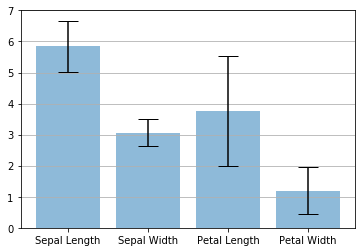

In [3]:
# 01 

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris().data

sepallength = iris[:,0:1]
sepalwidth = iris[:,1:2]
petallength = iris[:,2:3]
petalwidth = iris[:,3:4]

sepallength_mean = np.mean(sepallength)
sepalwidth_mean = np.mean(sepalwidth)
petallength_mean = np.mean(petallength)
petalwidth_mean = np.mean(petalwidth)

sepallength_std = np.std(sepallength)
sepalwidth_std = np.std(sepalwidth)
petallength_std = np.std(petallength)
petalwidth_std = np.std(petalwidth)

labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
x_pos = np.arange(len(labels))
CTEs = [sepallength_mean,sepalwidth_mean, petallength_mean,petalwidth_mean]
error = [sepallength_std, sepalwidth_std, petallength_std,petalwidth_std]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# The resulting plot contains three error bars. We can see the standard deviation of the Petal length data is 
# greater than the standard deviation of the steel by looking at the error by lengths.

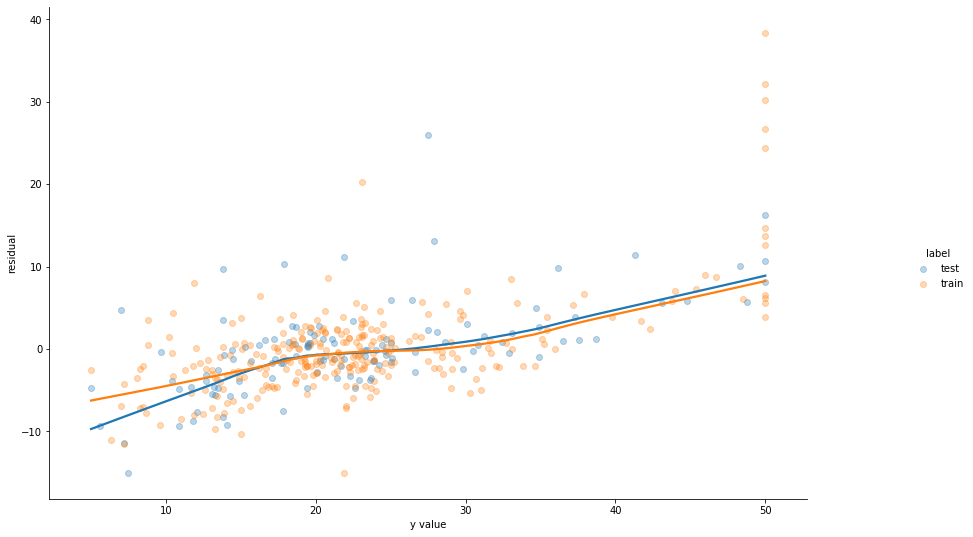

In [5]:
# 02 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


df_boston = pd.read_csv("boston_train.csv")

X = df_boston.drop(columns = ['MEDV'],axis = 1)
y = df_boston['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = Ridge().fit(X_train,y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

residuals_test = pd.DataFrame({'y value': y_test, 'residual': y_test - y_pred_test,'label' : "test"})

residuals_train = pd.DataFrame({'y value': y_train, 'residual': y_train - y_pred_train,'label' : "train"})

residuals = pd.concat([residuals_test, residuals_train])

lm = sns.lmplot(x = 'y value', y = 'residual',hue = 'label', data = residuals, lowess = True,scatter_kws={"alpha": 0.3})

lm.fig.set_size_inches(15,8)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("concrete_data.csv")

data_tr = df
data_tr=data_tr[(data_tr.T != 0).all()]

features = ['cement_component', 'flay_ash', 'water_component','superplasticizer', 'coarse_aggregate']

X_vlas = df[features]

y_vals = df['concrete_strength']

X_train,X_test,y_train,y_test = train_test_split(X_vlas,y_vals,test_size =0.3)

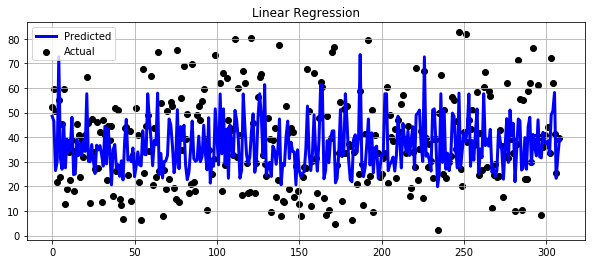

In [8]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Create linear regression object
lin_reg = LinearRegression()
# Train the model using the training sets
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(10,4))
plt.title("Linear Regression")
plt.scatter(range(len(y_test)), y_test, color='black',Label="Actual")
plt.plot(y_pred, color='blue', linewidth=3,Label="Predicted")
plt.grid()
plt.legend()

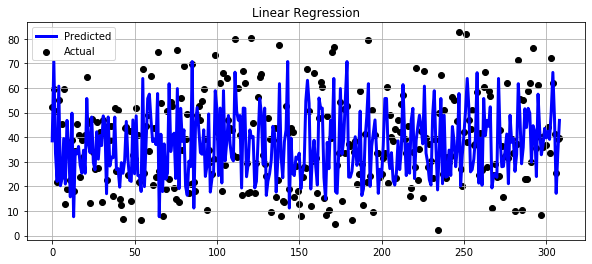

In [9]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

plt.figure(figsize=(10,4))
plt.title("Linear Regression")
plt.scatter(range(len(y_test)), y_test, color='black',Label="Actual")
plt.plot(y_pred, color='blue', linewidth=3,Label="Predicted")
plt.grid()
plt.legend()

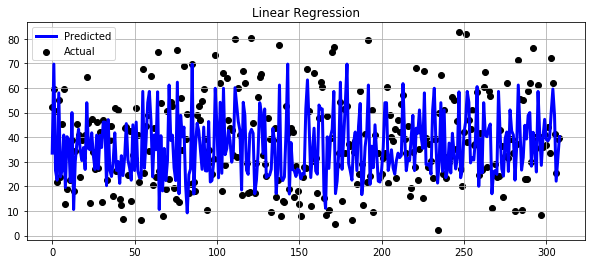

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plt.figure(figsize=(10,4))
plt.title("Linear Regression")
plt.scatter(range(len(y_test)), y_test, color='black',Label="Actual")
plt.plot(y_pred, color='blue', linewidth=3,Label="Predicted")
plt.grid()
plt.legend()

In [11]:
## Multiple Models With for Loop

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.model_selection import KFold

df = pd.read_csv("data.csv")

X_vals = df.iloc[:,0:5]
y_vals = df.iloc[:,-1]

# Normalization
scaler = StandardScaler()
X_vals = scaler.fit_transform(X_vals)

X_train,X_test,y_train,y_test = train_test_split(X_vals,y_vals,test_size=0.3,random_state = 10)

In [12]:
models =[]

models.append(("LinearRegression",LinearRegression()))
models.append(("Ridge Regression ",Ridge()))
models.append(("Lasso Regression",Lasso()))
models.append(("RadomForest",RandomForestRegressor()))
models.append(("GradientBoosting",GradientBoostingRegressor()))


model_name = []
mae = []
mse = []
rmse = []
r2score = []
explained_variance = []

Model : LinearRegression
Mean Absolute Error: 4.046440700829948
Mean Squared Error: 29.80310588231704
Root Mean Squared Error: 5.459222094979928
R2 Score: -1.3916590296562927
Explained Variance Score: 0.2881319054461223
1
*******************************************************************
Model : Ridge Regression 
Mean Absolute Error: 4.045907800668186
Mean Squared Error: 29.80263556385776
Root Mean Squared Error: 5.4591790192168785
R2 Score: -1.3947666597701893
Explained Variance Score: 0.2881423627823385
2
*******************************************************************
Model : Lasso Regression
Mean Absolute Error: 3.9271685183379086
Mean Squared Error: 31.02961369952779
Root Mean Squared Error: 5.570423116741473
R2 Score: -4.479193570986021
Explained Variance Score: 0.2586998013644194
3
*******************************************************************
Model : RadomForest
Mean Absolute Error: 0.1492361111111108
Mean Squared Error: 0.4377016203703705
Root Mean Squared Error: 0.66

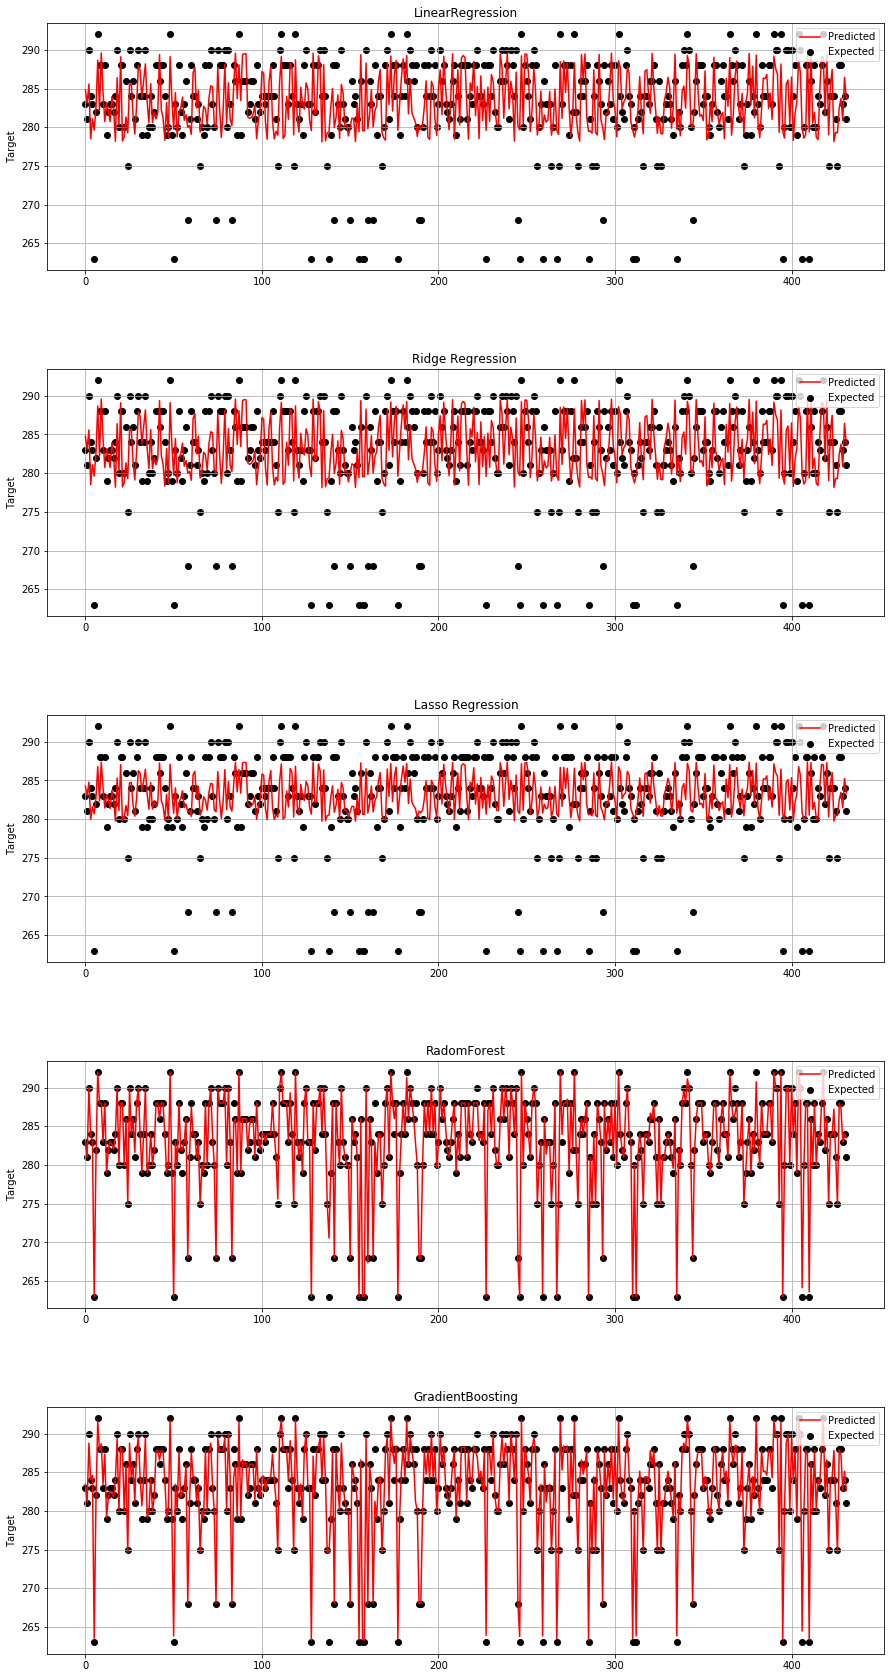

In [13]:
i =0

fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for name,model in models:
    i=i+1
    print("Model :",name)
    model_name.append(name)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    mae.append(mean_absolute_error(y_test, y_pred))
    
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 
    mse.append(mean_squared_error(y_test, y_pred))
    
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print("R2 Score:",r2_score(y_pred,y_test))  # Near 1 is good
    r2score.append(r2_score(y_pred,y_test))
    
    print("Explained Variance Score:",explained_variance_score(y_test,y_pred)) # Near 1 is Good
    explained_variance.append(explained_variance_score(y_test,y_pred))
    
    print(i)
    
    ax = fig.add_subplot(5, 1, i)
    ax.title.set_text(name)
    ax.scatter(range(len(y_test)),y_test,c='black',Label="Expected")
    ax.plot(range(len(y_test)),y_pred,c='r',Label= "Predicted")
    ax.set_ylabel('Target')
    ax.legend(loc='upper right')
    ax.grid()

    print("*******************************************************************")
    
dict = {"MSE": mse,"MAE":mae,"RMSE":rmse,"R2Score":r2score,"Explained Variance Score":explained_variance}

In [14]:
pd.DataFrame(dict,index=model_name)

,MSE,MAE,RMSE,R2Score,Explained Variance Score
LinearRegression,29.803106,4.046441,5.459222,-1.391659,0.288132
Ridge Regression,29.802636,4.045908,5.459179,-1.394767,0.288142
Lasso Regression,31.029614,3.927169,5.570423,-4.479194,0.258700
RadomForest,0.437702,0.149236,0.661590,0.989249,0.989543
GradientBoosting,0.904249,0.441420,0.950920,0.976894,0.978438
